In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

5
0
4
1
9


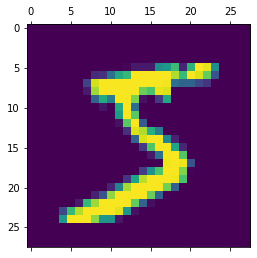

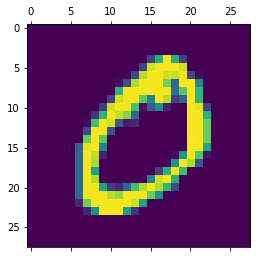

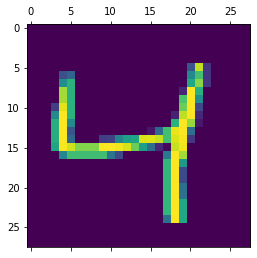

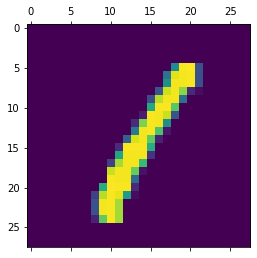

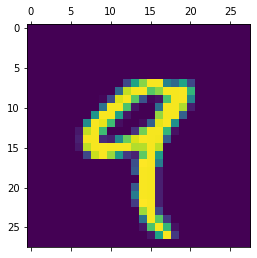

In [5]:
for i in range(5):
    plt.matshow(X_train[i])
    print(y_train[i])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train_flatten=X_train.reshape(len(X_train),-1)
X_train_flatten.shape

(60000, 784)

In [8]:
X_test_flatten=X_test.reshape(len(X_test),-1)
X_test_flatten.shape

(10000, 784)

* before scaling*

In [9]:
nn=keras.Sequential([
    keras.layers.Dense(500,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
nn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)
nn.fit(X_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.2484 - accuracy: 0.8433
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2838 - accuracy: 0.9259
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1913 - accuracy: 0.9496
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1558 - accuracy: 0.9592
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1344 - accuracy: 0.9636
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1149 - accuracy: 0.9691
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1056 - accuracy: 0.9725
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0964 - accuracy: 0.9762
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0847 - accuracy: 0.9787
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

In [10]:
X_train_flatten_scaled=X_train_flatten/255
X_test_flatten_scaled=X_test_flatten/255         # color ranges from 0 - 255

In [11]:
nn=keras.Sequential([
    keras.layers.Dense(500,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
nn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)
nn.fit(X_train_flatten_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.1949 - accuracy: 0.9416
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0806 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0549 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0420 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0310 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0229 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0189 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [14]:
nn.evaluate(X_test_flatten_scaled,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0986 - accuracy: 0.9804


[0.09860215336084366, 0.980400025844574]

In [23]:
y_predicted=nn.predict(X_test_flatten_scaled)
y_predicted[0]

313/313 [==============================] - 1s 4ms/step


array([1.2522008e-06, 3.0710793e-01, 1.8041541e-01, 8.5667297e-02,
       1.3793851e-08, 1.8902781e-05, 4.7194497e-09, 1.0000000e+00,
       2.4791207e-06, 6.2620705e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [24]:
for y in y_predicted[:5]:
    print(np.argmax(y))

7
2
1
0
4


In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
predicted_num=[]
for y in y_predicted:
    predicted_num.append(np.argmax(y))

In [29]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=predicted_num)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    0,    1,    1,    3,    1,    0,    0],
       [   0, 1131,    1,    1,    0,    0,    1,    0,    1,    0],
       [   3,    1, 1010,    5,    1,    0,    1,    6,    5,    0],
       [   1,    0,    5,  989,    0,    7,    0,    3,    4,    1],
       [   1,    0,    3,    0,  957,    0,    6,    1,    0,   14],
       [   2,    0,    0,    9,    1,  870,    4,    1,    4,    1],
       [   3,    4,    1,    0,    6,    5,  938,    0,    1,    0],
       [   1,    3,    6,    0,    1,    0,    0, 1006,    1,   10],
       [   2,    1,    4,    9,    3,    4,    1,    2,  941,    7],
       [   1,    4,    0,    3,    7,    3,    0,    1,    1,  989]])>

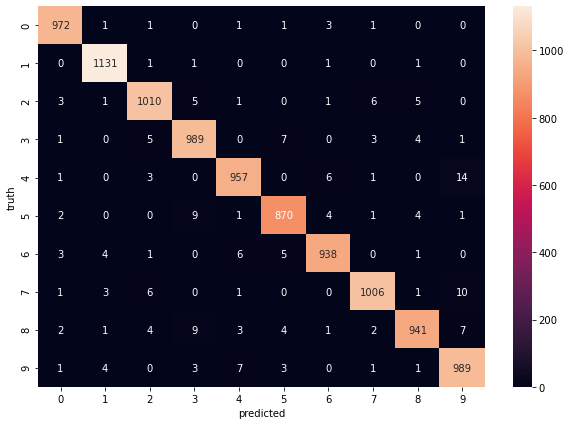

In [47]:
from seaborn import heatmap
plt.figure(figsize=(10,7))
heatmap(cm,annot=True,fmt='g')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
mod=RandomForestClassifier()
mod.fit(X_train_flatten,y_train)
mod.score(X_test_flatten,y_test)

0.9689

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [46]:
testnn=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # no nessesity of flattening input dataset
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
testnn.compile(
    optimizer='adamax',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
testnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.8198 - accuracy: 0.8626
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2768 - accuracy: 0.9175
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6899 - accuracy: 0.9338
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4442 - accuracy: 0.9424
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3120 - accuracy: 0.9498
